In [2]:
import	numpy	as	np
import	yfinance	as	yf
import	yfinance	as	yf
#	Data	Collection	and	Preprocessing:	Retrieving	Stock	Market	Data	and	Preparing	it	for	Analysis
#	Downloading	Stock	Market	Data
data	=	yf.download("AAPL	MSFT	NVDA",	start="2020-01-01",	end="2024-03-04")
data.head()

[*********************100%***********************]  3 of 3 completed


Price           Close                             High                        \
Ticker           AAPL        MSFT      NVDA       AAPL        MSFT      NVDA   
Date                                                                           
2020-01-02  72.716080  153.323273  5.972711  72.776606  153.428276  5.972711   
2020-01-03  72.009140  151.414139  5.877112  72.771768  152.683721  5.920929   
2020-01-06  72.582893  151.805450  5.901758  72.621631  151.872277  5.906986   
2020-01-07  72.241562  150.421387  5.973207  72.849239  152.416438  6.019015   
2020-01-08  73.403641  152.817352  5.984411  73.706271  153.495104  6.025738   

Price             Low                             Open                        \
Ticker           AAPL        MSFT      NVDA       AAPL        MSFT      NVDA   
Date                                                                           
2020-01-02  71.466820  151.137310  5.893294  71.721026  151.566865  5.943832   
2020-01-03  71.783985  150.879581  5.828068  71.941351  151.127779  5.852964   
2020-01-06  70.876060  149.399927  5.757612  71.127851  149.944040  5.783753   
2020-01-07  72.021246  150.173203  5.885077  72.592609  152.082346  5.930138   
2020-01-08  71.943751  150.774570  5.928894  71.943751  151.710046  5.968976   

Price          Volume                       
Ticker           AAPL      MSFT       NVDA  
Date                                        
2020-01-02  135480400  22622100  237536000  
2020-01-03  146322800  21116200  205384000  
2020-01-06  118387200  20813700  262636000  
2020-01-07  108872000  21634100  314856000  
2020-01-08  132079200  27746500  277108000

In [3]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 9.2 MB/s eta 0:00:00


In [4]:
#	Implementing	Hidden	Markov	Models:	Building	the	HMM	Model	and	Training	it	on	the	Stock	Market	Data
from	hmmlearn.hmm	import	GaussianHMM
#	Next,	we	will	initialize	and	train	our	HMM	model	using	the	preprocessed	stock	market	data.
#	We	will	use	a	Gaussian	Hidden	Markov	Model	for	this	demonstration.

In [5]:
!pip	install	--upgrade	threadpoolctl

In [6]:
! pip	install	threadpoolctl

In [7]:
# All	code
import	numpy	as	np
import	yfinance	as	yf
from	hmmlearn.hmm	import	GaussianHMM
import	matplotlib.pyplot	as	plt
#	Downloading	Stock	Market	Data
data	=	yf.download("AAPL	MSFT	NVDA",	start="2020-01-01",	end="2024-03-04")

[*********************100%***********************]  3 of 3 completed


[Training	Hidden	Markov	Model]	Training	completed.


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


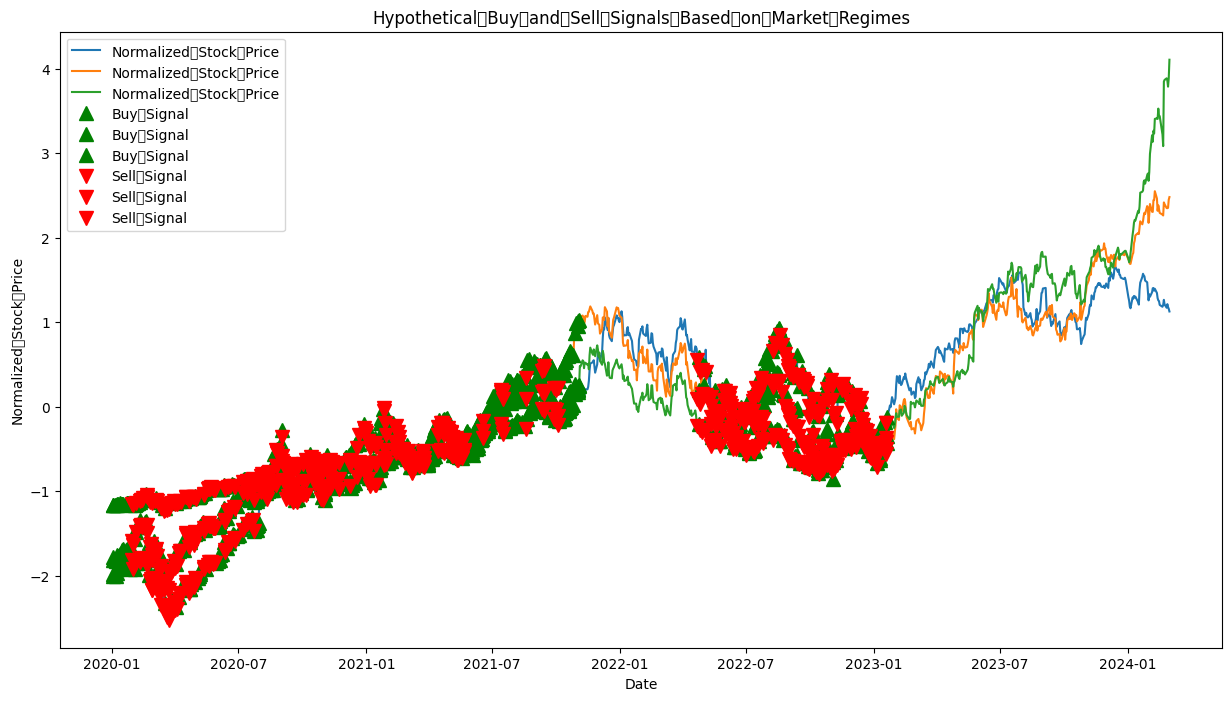

In [8]:
#	Preprocessing	Stock	Market	Data	(Example:	Normalizing	data)
normalized_data	=	(data	-	data.mean())	/	data.std()
#	Initializing	and	Training	the	HMM	Model	with	preprocessed	data
model	=	GaussianHMM(n_components=3,	covariance_type="full",	n_iter=1000)
model.fit(normalized_data)
print("[Training	Hidden	Markov	Model]	Training	completed.")
#	Predicting	Market	States	using	preprocessed	data
hidden_states	=	model.predict(normalized_data)
#	Hypothetical	Trading	Strategy	based	on	identified	market	states
buy_signal	=	(hidden_states	==	0)		#	Buy	when	in	Regime	1
sell_signal	=	(hidden_states	==	2)		#	Sell	when	in	Regime	3
#	Visualizing	Buy	and	Sell	Signals	along	with	stock	price	plot
plt.figure(figsize=(15,	8))
plt.plot(data.index,	normalized_data['Close'],	label='Normalized	Stock	Price')
plt.plot(data.index[buy_signal],	normalized_data['Close'][buy_signal],	'^',	markersize=10,	color='g',	label='Buy	Signal')
plt.plot(data.index[sell_signal],	normalized_data['Close'][sell_signal],	'v',	markersize=10,	color='r',	label='Sell	Signal')
plt.title('Hypothetical	Buy	and	Sell	Signals	Based	on	Market	Regimes')
plt.xlabel('Date')
plt.ylabel('Normalized	Stock	Price')
plt.legend()